<a href="https://colab.research.google.com/github/Ishlafakhri/RFM-Customer-Segmentation/blob/main/RFM_and_CLV_Segmentation_Using_K_Means_Online_Retails_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RFM Model

##Import Library and Dataset

In [1]:
#Install Plotly for Data Visualization
!pip install plotly
!pip install lifetimes

In [2]:
#Import Libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations on arrays
import matplotlib.pyplot as plt  # For creating plots and graphs
import seaborn as sns  # For making attractive and informative statistical graphics
from datetime import timedelta  # For handling time-based calculations
import plotly.express as px  # For interactive visualizations

In [3]:
#Import Data from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Load a CSV file into a DataFrame
df = pd.read_csv('/content/drive/MyDrive/Project Data Science/Online_Retail.csv', encoding='ISO-8859-1')

In [5]:
# Display the first five rows
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom

In [6]:
# Display information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##Data Cleaning and Preprocessing

In [7]:
import pandas as pd  # Importing the pandas library

# Dropping rows where 'CustomerID' is missing (NaN)
df = df.dropna(subset=['CustomerID'])

# Converting 'CustomerID' first to integer, then to string.
df['CustomerID'] = df['CustomerID'].astype(int).astype(str)

# Converting 'InvoiceDate' to a datetime object.
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

<ipython-input-7-9dbf77034987>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df['CustomerID'].astype(int).astype(str)
<ipython-input-7-9dbf77034987>:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


##Exploratory Data Analysis

In [8]:
'''
In this visualization, I noticed that our data has outliers with negative quantities, which shouldn't be negative.
Upon closely examining the dataset, I realized I hadn't removed the canceled products yet.
So, I need to remove these canceled products from the dataset.
'''

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with 'UnitPrice' and 'Quantity' columns
fig = make_subplots(rows=1, cols=2)

# Add a vertical boxplot for 'Quantity' in the first column
fig.add_trace(go.Box(y=df['Quantity'], name='Quantity'), row=1, col=1)

# Add a vertical boxplot for 'UnitPrice' in the second column
fig.add_trace(go.Box(y=df['UnitPrice'], name='UnitPrice'), row=1, col=2)

# Update the layout
fig.update_layout(
    title='Boxplots for Quantity and Unit Price',
    height=400,  # Adjust height as needed
    width=800    # Adjust width as needed
)

# Show the plot
fig.show()

In [9]:
# Removing rows where 'InvoiceNo' contains the letter 'C', 'C' Stands for cancellation
df = df[~df["InvoiceNo"].str.contains("C", na=False)]

In [10]:
# Boxplot visualization after we removed cancellation products
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with 'UnitPrice' and 'Quantity' columns
fig = make_subplots(rows=1, cols=2)

# Add a vertical boxplot for 'Quantity' in the first column
fig.add_trace(go.Box(y=df['Quantity'], name='Quantity'), row=1, col=1)

# Add a vertical boxplot for 'UnitPrice' in the second column
fig.add_trace(go.Box(y=df['UnitPrice'], name='UnitPrice'), row=1, col=2)

# Update the layout
fig.update_layout(
    title='Boxplots for Quantity and Unit Price',
    height=400,  # Adjust height as needed
    width=800    # Adjust width as needed
)

# Show the plot
fig.show()

In [11]:
# Print statistical summaries
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice
count  397924.000000                         397924  397924.000000
mean       13.021823  2011-07-10 23:43:36.912475648       3.116174
min         1.000000            2010-12-01 08:26:00       0.000000
25%         2.000000            2011-04-07 11:12:00       1.250000
50%         6.000000            2011-07-31 14:39:00       1.950000
75%        12.000000            2011-10-20 14:33:00       3.750000
max     80995.000000            2011-12-09 12:50:00    8142.750000
std       180.420210                            NaN      22.096788


In [12]:
'''
Based on the Boxplot Visualization and statistical summaries,
the data still contains outliers. Therefore, we need to remove these outliers
'''

# Function to remove outliers from a column
def remove_outliers(df, column):
    # Calculate IQR and define bounds for outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Remove outliers
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
# Apply the function to each numeric column
for column in df.select_dtypes(include='number').columns:
    df = remove_outliers(df, column)

In [13]:
# Print statistical summaries after remove outliers
'''
From the data statistical summaries, we can conclude that we now have a clean and ready-to-use dataset for modeling.
'''
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice
count  338182.000000                         338182  338182.000000
mean        7.476811  2011-07-12 18:17:08.072754176       2.191816
min         1.000000            2010-12-01 08:26:00       0.000000
25%         2.000000            2011-04-08 09:54:00       1.250000
50%         6.000000            2011-08-03 13:39:00       1.650000
75%        12.000000            2011-10-23 14:47:00       2.950000
max        27.000000            2011-12-09 12:50:00       7.500000
std         6.770883                            NaN       1.544842


In [14]:
# Boxplot visualization after remove outliers
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Assuming 'df' is your DataFrame with 'UnitPrice' and 'Quantity' columns
fig = make_subplots(rows=1, cols=2)

# Add a vertical boxplot for 'Quantity' in the first column
fig.add_trace(go.Box(y=df['Quantity'], name='Quantity'), row=1, col=1)

# Add a vertical boxplot for 'UnitPrice' in the second column
fig.add_trace(go.Box(y=df['UnitPrice'], name='UnitPrice'), row=1, col=2)

# Update the layout
fig.update_layout(
    title='Boxplots for Quantity and Unit Price',
    height=400,  # Adjust height as needed
    width=800    # Adjust width as needed
)

# Show the plot
fig.show()

##Data Modelling

In [15]:
# Printing the number of rows and columns
print('{:,} rows; {:,} columns'
      .format(df.shape[0], df.shape[1]))
# Printing the number of transactions without a CustomerID
print('{:,} transactions don\'t have a CustomerID'
      .format(df[df.CustomerID.isnull()].shape[0]))
# Printing the timeframe of transactions
print('Transactions timeframe from {} to {}'.format(df['InvoiceDate'].min(),
                                    df['InvoiceDate'].max()))

338,182 rows; 8 columns
0 transactions don't have a CustomerID
Transactions timeframe from 2010-12-01 08:26:00 to 2011-12-09 12:50:00


In [16]:
# --Group data by CustomerID--

# Calculating the total sum for each transaction
df['TotalSum'] = df['UnitPrice']*df['Quantity']

# Setting the snapshot date to the day after the last transaction
snapshot_date = df['InvoiceDate'].max() + timedelta(days=1)
print(snapshot_date)

# Aggregating data per customer
data_process = df.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days, #Calculate recency as days since last purchase
    'InvoiceNo': 'nunique',  #Count the unique number of invoices as frequency
    'TotalSum': 'sum' #Sum the total monetary value of purchases
})

#Renaming columns to more descriptive names for RFM analysis
data_process.rename(columns={'InvoiceDate': 'Recency',
                         'InvoiceNo': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

# Rounding the results
data_process = data_process.astype(int)

2011-12-10 12:50:00


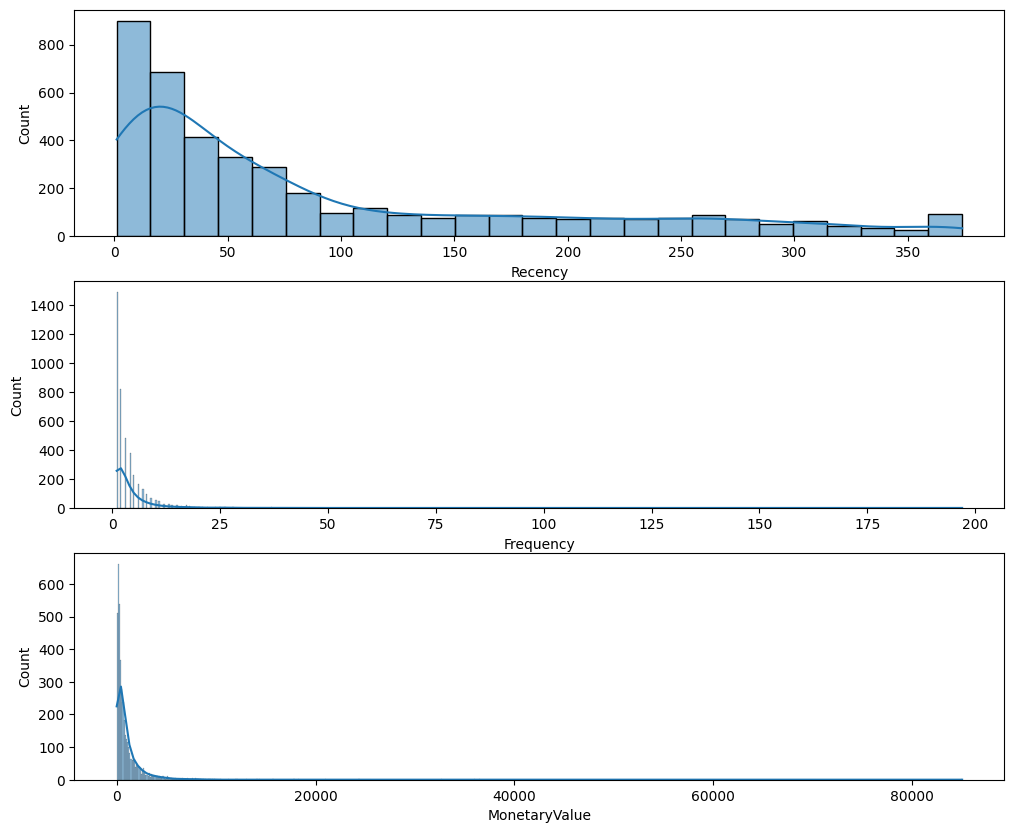

In [17]:
# Plot RFM distributions
plt.figure(figsize=(12,10))

# Plot distribution of R
plt.subplot(3, 1, 1)
sns.histplot(data_process['Recency'], kde=True)

# Plot distribution of F
plt.subplot(3, 1, 2)
sns.histplot(data_process['Frequency'], kde=True)

# Plot distribution of M
plt.subplot(3, 1, 3)
sns.histplot(data_process['MonetaryValue'], kde=True)

# Show the plot
plt.show()

In [18]:
'''
Our dataset exhibits a skewed distribution;
therefore, we need to standardize our data first.
'''
#Import Library
from sklearn.preprocessing import StandardScaler

# Define the feature columns to be standardized.
feature_cols = ['Recency','Frequency','MonetaryValue']

#Create a copy of the dataframe to hold the standardized values. This ensures the original data is not modified.
standardized_data = data_process.copy()

#Initialize the StandardScaler
scaler = StandardScaler()

#Compute the mean and standard deviation for scaling later, using only the feature columns specified earlier.
scaler.fit(data_process[feature_cols])

#Perform standardization by centering and scaling, based on the mean and standard deviation computed above.
standardized_features = scaler.transform(data_process[feature_cols])

#Update the original dataframe with the standardized values for the feature columns.
standardized_data[feature_cols] = standardized_features

In [19]:
# fit K-means clustering on various Ks
from sklearn.cluster import KMeans
kmeans_kwargs = {
    "init" : "random",
    "n_init" : 10
}
sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(standardized_data[feature_cols])
    sse.append(kmeans.inertia_)

In [20]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=list(range(1, 11)), y=sse, mode='lines+markers'))
fig.update_layout(
    title="Elbow Method for Optimal Number of Clusters",
    xaxis_title="Number of Clusters",
    yaxis_title="Sum of Squared Error"
)
fig.show()

In [21]:
from sklearn.cluster import KMeans

# Your KMeans configuration
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,  # This can be set to define the maximum number of iterations
    "random_state": 42  # Set the random state for reproducibility
}

# Run KMeans with the optimal k
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(standardized_data[feature_cols])

# Add 1 to each label to change cluster numbering from 1
data_process['cluster'] = kmeans.labels_ + 1

# Reset the index of the DataFrame so 'CustomerID' becomes a regular column
data_process = data_process.reset_index()

# Group by cluster and calculate means and counts
centroid_df = data_process.groupby('cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean',
    'CustomerID': 'nunique'
}).reset_index()

# Rename the 'CustomerID' column to 'NumCustomers'
centroid_df = centroid_df.rename(columns={'CustomerID': 'NumCustomers'})

# Sort by 'Frequency' in descending order
centroid_df = centroid_df.sort_values(by='Frequency', ascending=False)

# Add a new column 'MapCluster' based on frequency quartiles
centroid_df['MapCluster'] = pd.qcut(centroid_df['Frequency'], 3, labels=[1, 2, 3])

# Convert 'MapCluster' to integer type
centroid_df['MapCluster'] = centroid_df['MapCluster'].astype(int)

# Merge centroid_df with data_process to add 'MapCluster'
data_process = data_process.merge(centroid_df[['cluster', 'MapCluster']], on='cluster', how='left').reset_index(drop=True)

##Result

In [22]:
# Assigning cluster names to the centroids in the dataframe
cluster_names = ['Platinum', 'Gold', 'Silver']
# Adds a new column 'ClusterName' to centroid_df with the provided names
centroid_df['ClusterName'] = cluster_names
# Display the dataframe with the new 'ClusterName' column
centroid_df

cluster     Recency   Frequency  MonetaryValue  NumCustomers  MapCluster  \
0        1    2.750000  103.875000   32693.750000             8           3   
1        2   39.731802    4.627629    1202.167583          3091           2   
2        3  242.225984    1.555352     310.493138          1093           1   

  ClusterName  
0    Platinum  
1        Gold  
2      Silver

In [23]:
# Define rfm_level function
def rfm_level(data_process):
    if data_process['MapCluster'] == 3:
        return 'Platinum'
    elif (data_process['MapCluster'] == 2):
        return 'Gold'
    else:
        return 'Silver'
# Create a new variable RFM_Level
data_process['RFM_Level'] = data_process.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
data_process.head()

CustomerID  Recency  Frequency  MonetaryValue  cluster  MapCluster RFM_Level
0      12347        2          7           3314        2           2      Gold
1      12348      249          3             90        3           1    Silver
2      12349       19          1            999        2           2      Gold
3      12350      310          1            294        3           1    Silver
4      12352       36          7           1130        2           2      Gold

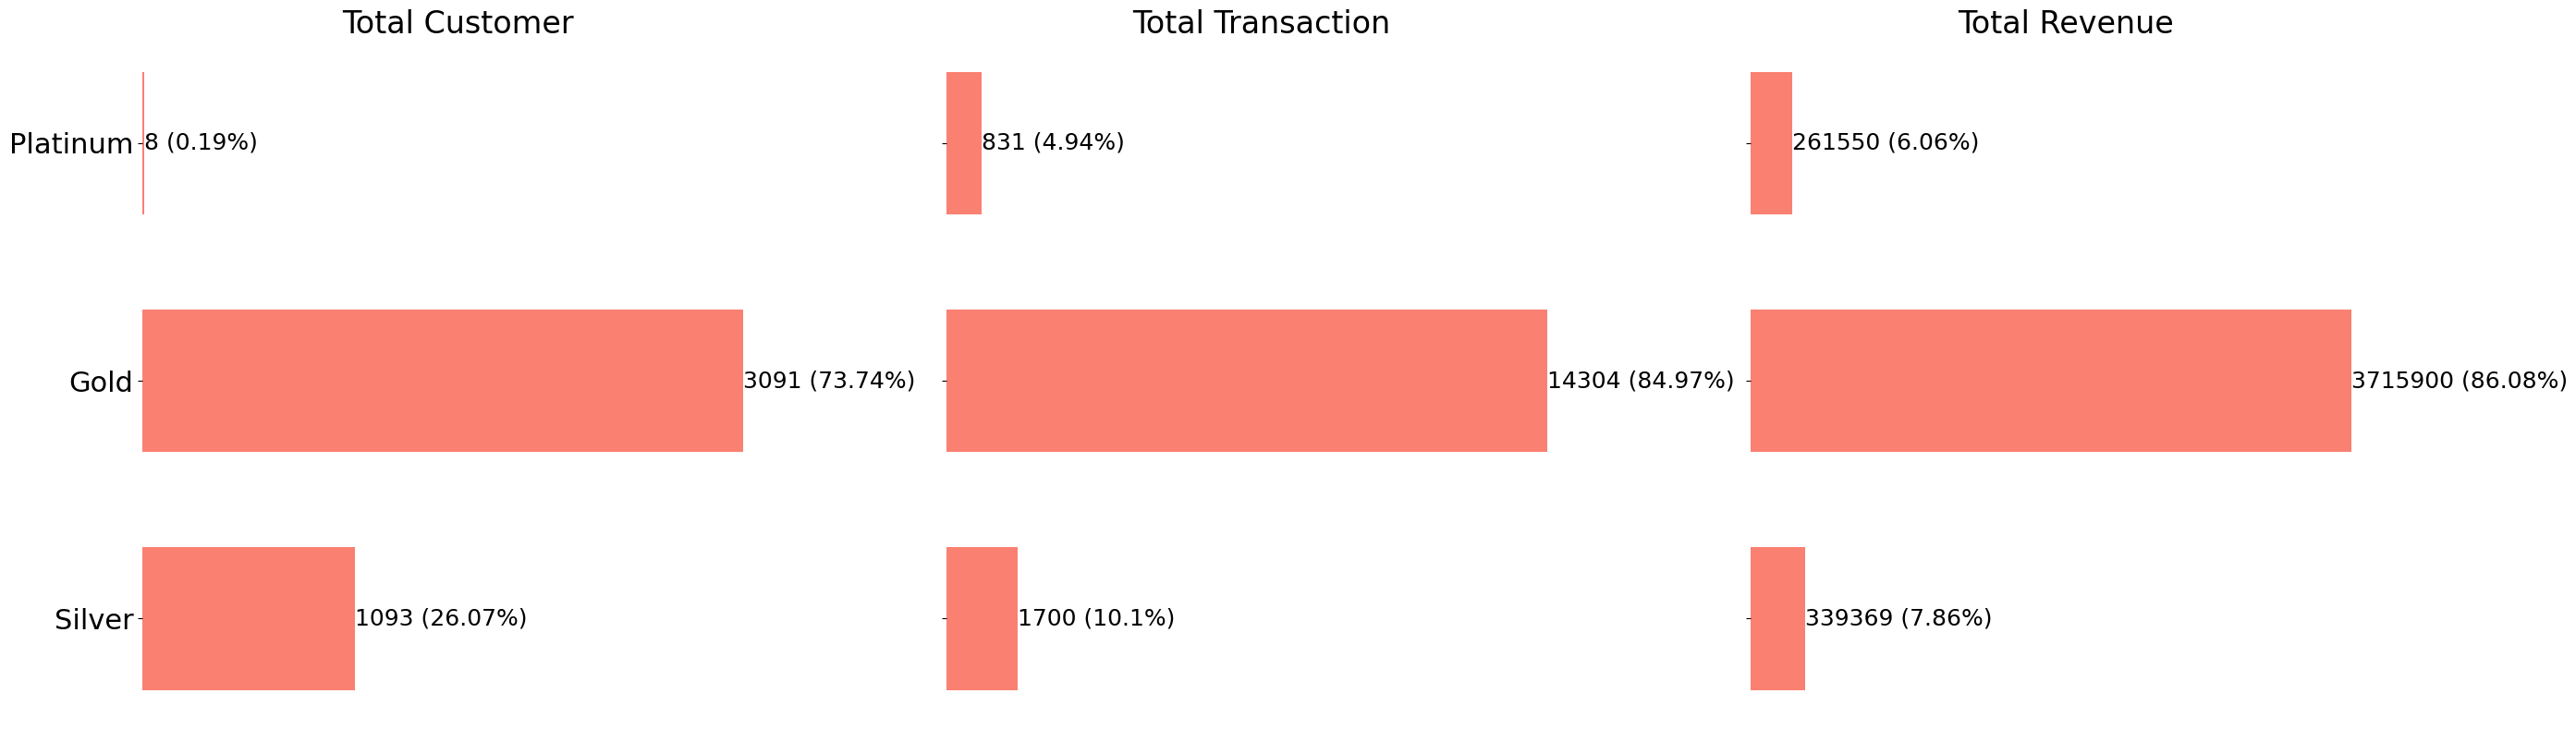

In [24]:
# Group by RFM_Level and MapCluster, then calculate total values
final_df = data_process.groupby(['RFM_Level', 'MapCluster']).agg({
    'CustomerID': 'nunique',  # Count unique customers
    'Frequency': 'sum',  # Calculate total Frequency
    'MonetaryValue': 'sum'  # Calculate total Monetary Value
}).reset_index()

# Calculate percentages for each column
final_df['Customer_Percentage'] = (final_df['CustomerID'] / final_df['CustomerID'].sum() * 100).round(2)
final_df['Frequency_Percentage'] = (final_df['Frequency'] / final_df['Frequency'].sum() * 100).round(2)
final_df['MonetaryValue_Percentage'] = (final_df['MonetaryValue'] / final_df['MonetaryValue'].sum() * 100).round(2)

# Sort the DataFrame by 'MapCluster' for visualization purposes
final_df.sort_values('MapCluster', inplace=True)

# Set the font size for annotations, labels, and titles
annotation_font_size = 18  # Adjust this value for the text inside the bars
labels_font_size = 22      # Adjust this value for the y-axis labels
title_font_size = 24      # Adjust this value for the titles

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(28, 8), sharey=True)

# Define the columns and titles
columns = ['CustomerID', 'Frequency', 'MonetaryValue']
titles = ['Total Customer', 'Total Transaction', 'Total Revenue']
percentages = [final_df['Customer_Percentage'], final_df['Frequency_Percentage'], final_df['MonetaryValue_Percentage']]

# Define the bar thickness
bar_thickness = 0.6  # Adjust this value to your preference

# Loop through each column to create the bar charts
for ax, col, title in zip(axes, columns, titles):
    # Plot the data with increased bar thickness
    ax.barh(final_df['RFM_Level'], final_df[col], color='salmon', height=bar_thickness)
    ax.set_title(title, size=title_font_size)

    # Set the y-ticks and labels according to the sorted DataFrame
    ax.set_yticks(range(len(final_df['RFM_Level'])))
    ax.set_yticklabels(final_df['RFM_Level'], fontsize=labels_font_size)

    # Remove the x-axis (this will remove both the ticks and labels)
    ax.get_xaxis().set_visible(False)

    # Annotate the bars with the value and percentage
    for i, value in enumerate(final_df[col]):
        # Find the corresponding percentage column name based on the 'col' variable
        if col == 'CustomerID':
            perc = 'Customer_Percentage'
        elif col == 'Frequency':
            perc = 'Frequency_Percentage'
        elif col == 'MonetaryValue':
            perc = 'MonetaryValue_Percentage'

        # Retrieve the percentage value using the correct percentage column name
        pct = final_df[perc].iloc[i]
        ax.text(value, i, f'{value} ({pct}%)', ha='left', va='center', fontsize=annotation_font_size)

    # Remove the spines for each subplot
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [25]:
import plotly.express as px
# Creating a 3D scatter plot for RFM segmentation with color mapping for different RFM levels.
fig = px.scatter_3d(data_process, x='Recency', y='Frequency', z='MonetaryValue',
              color='RFM_Level', color_discrete_map={"Platinum": "blue", "Gold": "gold", "Silver": "darkgrey"},
              title="RFM Segmentation")
fig.show()  # Displays the plot in an interactive window.

#CLTV Model

##Calibration vs Holdout

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 338182 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    338182 non-null  object        
 1   StockCode    338182 non-null  object        
 2   Description  338182 non-null  object        
 3   Quantity     338182 non-null  int64         
 4   InvoiceDate  338182 non-null  datetime64[ns]
 5   UnitPrice    338182 non-null  float64       
 6   CustomerID   338182 non-null  object        
 7   Country      338182 non-null  object        
 8   TotalSum     338182 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 25.8+ MB


In [27]:
import datetime as dt
import lifetimes

#Size of the data
diff_time = df["InvoiceDate"].max() - df["InvoiceDate"].min()
diff_time

Timedelta('373 days 04:24:00')

In [28]:
from lifetimes.utils import calibration_and_holdout_data

#train/test split (calibration/holdout)
#days to reserve for holdout period
t_holdout = 181

# end date of observations
max_date = df["InvoiceDate"].max()
print("End of observations:", max_date)

# end date of chosen calibration period
max_cal_date = max_date - timedelta(days=t_holdout)
print("End of calibration period:", max_cal_date)

df_ch = calibration_and_holdout_data(
        transactions = df,
        customer_id_col = "CustomerID",
        datetime_col = "InvoiceDate",
        monetary_value_col = "TotalSum",
        calibration_period_end = max_cal_date,
        observation_period_end = max_date,
        freq = "D")

print("Customer behavior in calibration and holdout periods")
pd.options.display.float_format = '{:,.0f}'.format
df_ch

End of observations: 2011-12-09 12:50:00
End of calibration period: 2011-06-11 12:50:00
Customer behavior in calibration and holdout periods


frequency_cal  recency_cal  T_cal  monetary_value_cal  \
CustomerID                                                          
12347                   3          184    186                 371   
12348                   2          110    177                  19   
12350                   0            0    129                   0   
12352                   3           34    115                 104   
12353                   0            0     23                   0   
...                   ...          ...    ...                 ...   
18272                   1           21     65                 322   
18273                   0            0     76                   0   
18280                   0            0     96                   0   
18283                   4          137    156                 102   
18287                   0            0     20                   0   

            frequency_holdout  monetary_value_holdout  duration_holdout  
CustomerID                                                               
12347                       3                      22               181  
12348                       0                       0               181  
12350                       0                       0               181  
12352                       3                      16               181  
12353                       0                       0               181  
...                       ...                     ...               ...  
18272                       4                      19               181  
18273                       1                      51               181  
18280                       0                       0               181  
18283                       9                       3               181  
18287                       2                      19               181  

[2688 rows x 7 columns]

In [29]:
df_ch.describe()

frequency_cal  recency_cal  T_cal  monetary_value_cal  \
count          2,688        2,688  2,688               2,688   
mean               1           52    118                 126   
std                3           64     58                 198   
min                0            0      1                   0   
25%                0            0     73                   0   
50%                0            0    123                   0   
75%                2          106    178                 207   
max               48          191    192               3,182   

       frequency_holdout  monetary_value_holdout  duration_holdout  
count              2,688                   2,688             2,688  
mean                   2                      12               181  
std                    4                      13                 0  
min                    0                       0               181  
25%                    0                       0               181  
50%                    1                      12               181  
75%                    3                      19               181  
max                   81                     149               181

In [30]:
from lifetimes import BetaGeoFitter
#training: BG/NBD Model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=1e-06)
bgf.fit(
        frequency = df_ch["frequency_cal"],
        recency = df_ch["recency_cal"],
        T = df_ch["T_cal"],
        weights = None,
        verbose = True)

Optimization terminated successfully.
         Current function value: -0.278287
         Iterations: 53
         Function evaluations: 55
         Gradient evaluations: 55


<lifetimes.BetaGeoFitter: fitted with 2688 subjects, a: 0.00, alpha: 67.16, b: 0.00, r: 0.76>

In [31]:
bgf.summary

coef  se(coef)  lower 95% bound  upper 95% bound
r         1         0                1                1
alpha    67         4               60               75
a         0         0               -0                0
b         0        10              -19               19

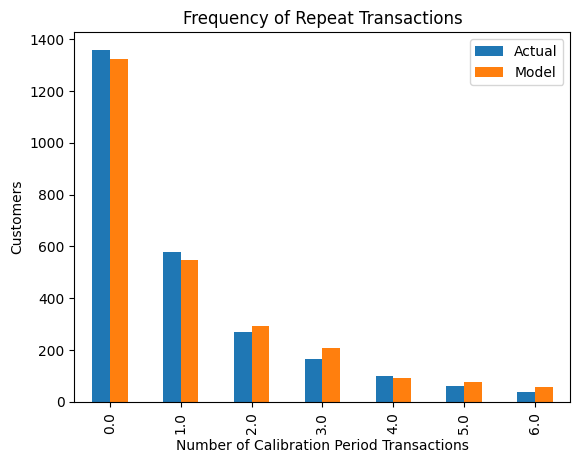

In [32]:
from lifetimes.plotting import plot_period_transactions

_ = plot_period_transactions(bgf)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

<Figure size 700x700 with 0 Axes>

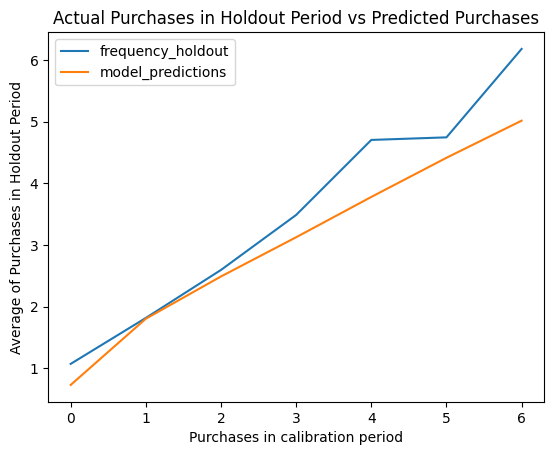

In [33]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases
#testing: predicted vs actual purchases in holdout period
fig = plt.figure(figsize=(7, 7))
plot_calibration_purchases_vs_holdout_purchases(bgf, df_ch)

In [34]:
# the real number of transactions in the observation period, which equals frequency_holdout + 1
df_ch["n_transactions_holdout_real"]  = df_ch["frequency_holdout"] + 1

# the predicted number of transactions in the next 181 days (length of the observation period)
df_ch["n_transactions_holdout_pred"] = bgf.predict(t=181,
                                                    frequency=df_ch['frequency_cal'],
                                                    recency=df_ch['recency_cal'],
                                                    T=df_ch['T_cal'])

# comparison of the real and predicted transactions
df_ch[["n_transactions_holdout_real", "n_transactions_holdout_pred"]].head()

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



n_transactions_holdout_real  n_transactions_holdout_pred
CustomerID                                                          
12347                                 4                            3
12348                                 1                            2
12350                                 1                            1
12352                                 4                            4
12353                                 1                          NaN

In [35]:
from sklearn.metrics import mean_squared_error

# Fill NaN values with 0
df_ch["n_transactions_holdout_real"].fillna(0, inplace=True)
df_ch["n_transactions_holdout_pred"].fillna(0, inplace=True)

# Compute RMSE
RMSE = mean_squared_error(y_true=df_ch["n_transactions_holdout_real"],
                          y_pred=df_ch["n_transactions_holdout_pred"],
                          squared=False)

RMSE

2.888243784621575

##Predict Future Number of Purchases

In [36]:
from lifetimes.utils import summary_data_from_transaction_data

#Determine recency, frequency, T, monetary value for each customer
df_rft = lifetimes.utils.summary_data_from_transaction_data(
        transactions = df,
        customer_id_col = "CustomerID",
        datetime_col = "InvoiceDate",
        monetary_value_col = "TotalSum",
        observation_period_end = max_date,
        freq = "D")

pd.options.display.float_format = '{:,.0f}'.format
df_rft

frequency  recency   T  monetary_value
CustomerID                                        
12347               6      365 367             444
12348               2      110 358              19
12349               0        0  18               0
12350               0        0 310               0
12352               6      260 296             150
...               ...      ...  ..             ...
18280               0        0 277               0
18281               0        0 180               0
18282               1      119 126              52
18283              13      334 337             150
18287               2      159 201             260

[4192 rows x 4 columns]

In [37]:
df_rft.describe()

frequency  recency     T  monetary_value
count      4,192    4,192 4,192           4,192
mean           3      129   221             169
std            6      132   118             212
min            0        0     0               0
25%            0        0   109               0
50%            1       90   246             121
75%            3      250   324             262
max          129      373   373           3,182

In [38]:
from lifetimes import BetaGeoFitter
#BG/NBD Model
bgf = lifetimes.BetaGeoFitter(penalizer_coef=1e-06)
bgf.fit(
        frequency = df_rft["frequency"],
        recency = df_rft["recency"],
        T = df_rft["T"],
        weights = None,
        verbose = True)

pd.options.display.float_format = '{:,.3f}'.format
bgf.summary

Optimization terminated successfully.
         Current function value: -2.398099
         Iterations: 57
         Function evaluations: 58
         Gradient evaluations: 58


coef  se(coef)  lower 95% bound  upper 95% bound
r      0.841     0.028            0.786            0.897
alpha 73.367     2.843           67.795           78.939
a      0.000     0.000           -0.000            0.000
b      0.000     7.685          -15.062           15.063

<Figure size 1200x1200 with 0 Axes>

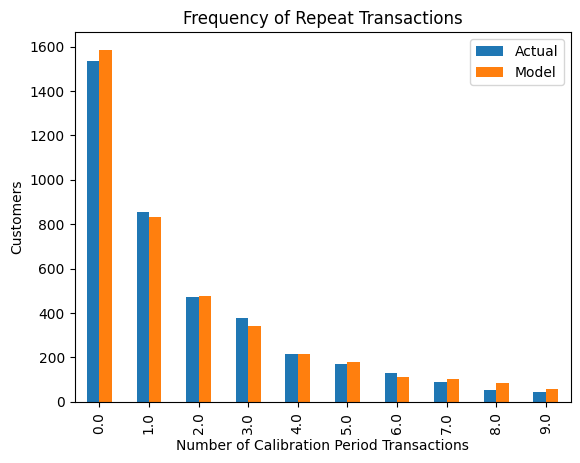

In [39]:
#frequency of repeat transaction: predicted vs actual
fig = plt.figure(figsize=(12, 12))
plot_period_transactions(
            model = bgf,
            max_frequency = 10);

In [40]:
from lifetimes.plotting import plot_frequency_recency_matrix

#axis length
max_freq = int(df_rft["frequency"].max())
max_T = int(df_rft["T"].max())
max_rec = int(df_rft["recency"].max())

#Helper function: plot expected number of future purchases a customer
#with frequency f and recency r will make in forecast period
def plot_freq_rec(t):
    fig = plt.figure(figsize=(7, 7))
    plot_frequency_recency_matrix(
            model = bgf,
            T = t,
            max_frequency = max_freq,
            max_recency = max_rec);

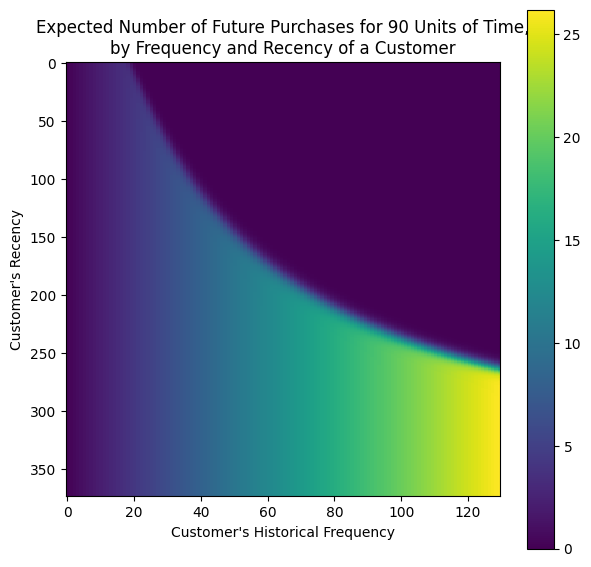

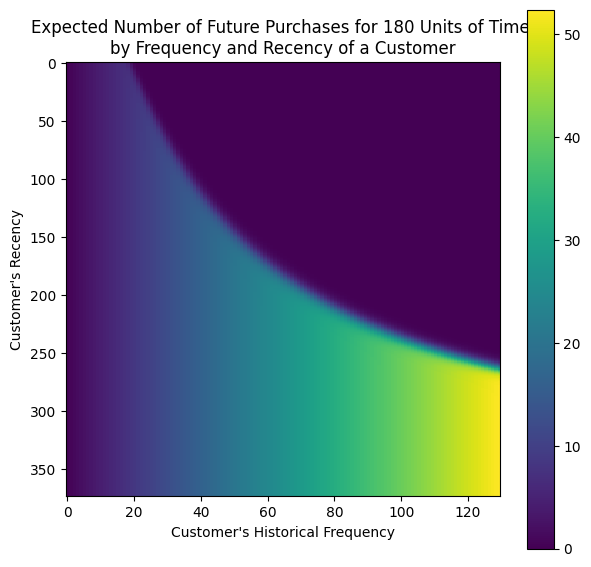

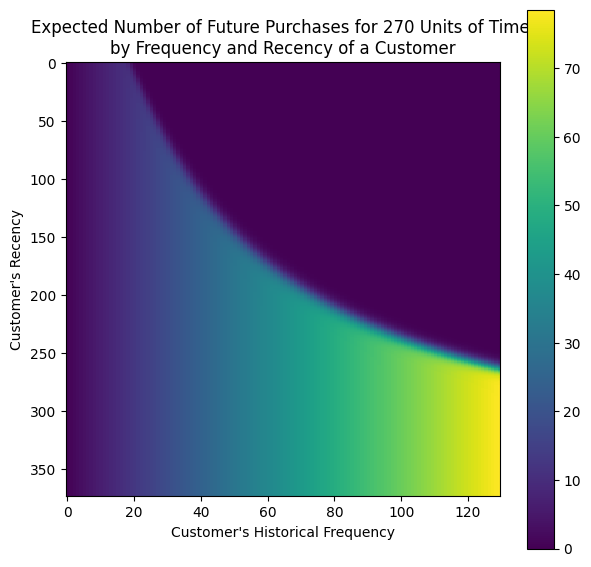

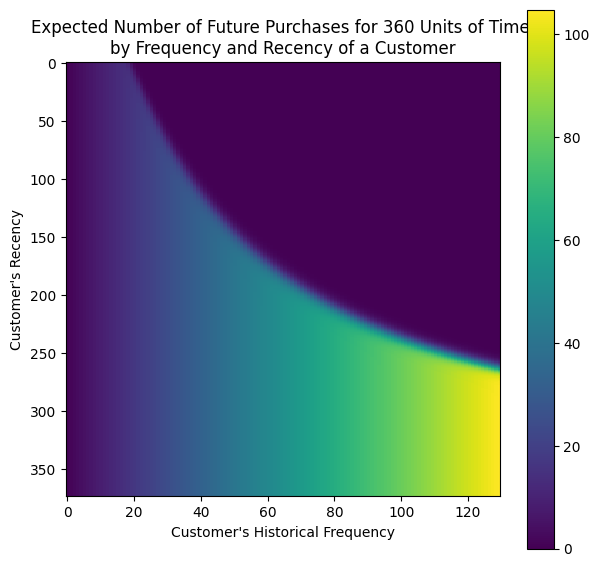

In [41]:
#Call plotter function for different forecast periods:
tFC = [90, 180, 270, 360]
_ = [plot_freq_rec(t) for t in tFC]

In [42]:
#Function to predict each customer's purchase over next t days
def predict_purch(df, t):
    df["predict_purch_" + str(t)] = \
        bgf.predict(
            t,
            df["frequency"],
            df["recency"],
            df["T"])

In [43]:
#axis length
max_freq = int(df_rft["frequency"].max())
max_T = int(df_rft["T"].max())
max_rec = int(df_rft["recency"].max())
print(max_freq)

129


In [44]:
#Call function
t_FC = [90, 180, 270, 360]
_ = [predict_purch(df_rft, t) for t in t_FC]
pd.options.display.float_format = '{:,.1f}'.format
print("predicted number of purchases for each customer over next t days:")
pd.options.display.float_format = '{:,.0f}'.format
df_rft

predicted number of purchases for each customer over next t days:


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

invalid value encountered in log



frequency  recency   T  monetary_value  predict_purch_90  \
CustomerID                                                             
12347               6      365 367             444                 1   
12348               2      110 358              19                 1   
12349               0        0  18               0                 1   
12350               0        0 310               0                 0   
12352               6      260 296             150                 2   
...               ...      ...  ..             ...               ...   
18280               0        0 277               0                 0   
18281               0        0 180               0                 0   
18282               1      119 126              52                 1   
18283              13      334 337             150                 3   
18287               2      159 201             260                 1   

            predict_purch_180  predict_purch_270  predict_purch_360  
CustomerID                                                           
12347                       3                  4                  6  
12348                       1                  2                  2  
12349                     NaN                NaN                NaN  
12350                       0                  1                  1  
12352                       3                  5                  7  
...                       ...                ...                ...  
18280                       0                  1                  1  
18281                       1                  1                NaN  
18282                       2                  2                  3  
18283                       6                  9                 12  
18287                       2                  3                  4  

[4192 rows x 8 columns]

In [45]:
#Top 10 customer over next 360 days
print("Top 10 customers, by their prpedicted purchases over next 360 days")
df_rft.sort_values(by="predict_purch_360", ascending=False).head(10)

Top 10 customers, by their prpedicted purchases over next 360 days


frequency  recency   T  monetary_value  predict_purch_90  \
CustomerID                                                             
14911             129      372 373             657                26   
17841             111      372 373             290                23   
12748             110      373 373             191                22   
15311              89      373 373             195                18   
14606              87      372 373              93                18   
12971              63      369 372              85                13   
13089              58      364 368             606                12   
14527              53      367 369              79                11   
14096              16       97 101           2,251                 9   
15039              41      359 368             334                 9   

            predict_purch_180  predict_purch_270  predict_purch_360  
CustomerID                                                           
14911                      52                 79                105  
17841                      45                 68                 90  
12748                      45                 67                 89  
15311                      36                 54                 72  
14606                      35                 53                 71  
12971                      26                 39                 52  
13089                      24                 36                 48  
14527                      22                 33                 44  
14096                      17                 26                 35  
15039                      17                 26                 34

predicted average number of customer purchases over next 360 days:


<ipython-input-46-66143a5e3a7c>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




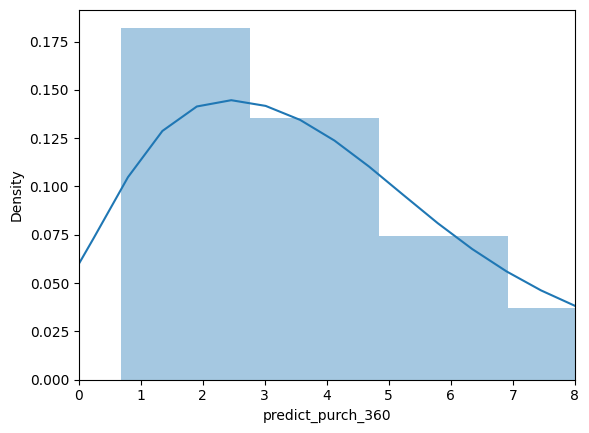

In [46]:
print("predicted average number of customer purchases over next 360 days:")
ax = sns.distplot(df_rft["predict_purch_360"]).set_xlim(0,8)

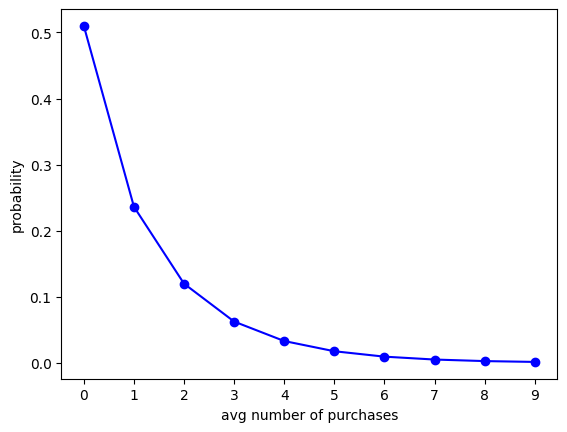

In [47]:
#Function probability of n repeat purchases within t days
def prob_purch(t, n):
    p = bgf.probability_of_n_purchases_up_to_time(t, n)
    return p

#Call function prob_purch
#t : forecast period (days)
#purch: number of repeat purchases
t = 90
purch = range(0,10,1)
probs = [prob_purch(t,n) for n in purch]
dict_probs = dict(zip(purch, probs))

plt.plot(purch, probs, '-o', color='blue')
plt.xlabel("avg number of purchases")
plt.ylabel("probability")
plt.xticks(purch)
plt.show()

##Probability of Being Alive

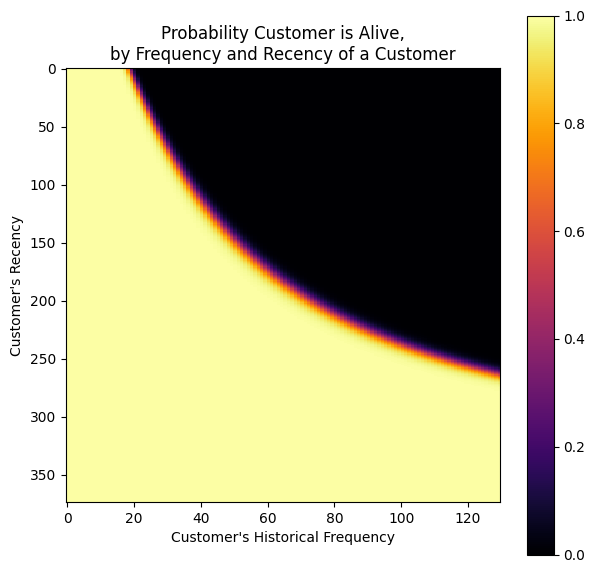

In [48]:
#Probability that a customer has not churned(='is alive')
#Based on customer's spesific recency r and frequency f
from lifetimes.plotting import plot_probability_alive_matrix
fig = plt.figure(figsize=(7,7))
plot_probability_alive_matrix(
                    model = bgf,
                    max_frequency = max_freq,
                    max_recency = max_rec,
                    cmap='inferno');

In [49]:
#Probability that a customer is alive for each customer in dataframe
prob_alive = bgf.conditional_probability_alive(
                frequency = df_rft["frequency"],
                recency = df_rft["recency"],
                T = df_rft["T"])

df_rft["prob_alive"] = prob_alive
pd.options.display.float_format = '{:,.2f}'.format
df_rft.describe()

frequency  recency        T  monetary_value  predict_purch_90  \
count   4,192.00 4,192.00 4,192.00        4,192.00          4,183.00   
mean        2.71   128.86   220.84          169.17              1.03   
std         5.66   131.59   117.90          212.35              1.20   
min         0.00     0.00     0.00            0.00              0.17   
25%         0.00     0.00   109.00            0.00              0.44   
50%         1.00    90.00   246.00          121.21              0.74   
75%         3.00   250.00   324.00          262.39              1.22   
max       129.00   373.00   373.00        3,182.32             26.18   

       predict_purch_180  predict_purch_270  predict_purch_360  prob_alive  
count           3,578.00           3,363.00           3,146.00    4,192.00  
mean                2.18               3.40               4.77        1.00  
std                 2.58               3.95               5.37        0.00  
min                 0.34               0.51               0.68        1.00  
25%                 0.77               1.23               1.91        1.00  
50%                 1.57               2.53               3.58        1.00  
75%                 2.76               4.22               5.80        1.00  
max                52.36              78.54             104.72        1.00

##Predict Monetary Value of Transactions

In [50]:
#Select customers with monetary value > 0
df_rftv = df_rft[df_rft["monetary_value"]>0]
pd.options.display.float_format = '{:,.2f}'.format
df_rftv.describe()

frequency  recency        T  monetary_value  predict_purch_90  \
count   2,656.00 2,656.00 2,656.00        2,656.00          2,656.00   
mean        4.28   203.38   259.28          267.01              1.37   
std         6.62   110.33   101.28          212.25              1.39   
min         1.00     1.00     9.00            0.95              0.37   
25%         1.00   107.00   196.00          134.57              0.67   
50%         3.00   210.00   283.00          220.57              1.04   
75%         5.00   301.00   358.00          337.49              1.61   
max       129.00   373.00   373.00        3,182.32             26.18   

       predict_purch_180  predict_purch_270  predict_purch_360  prob_alive  
count           2,656.00           2,656.00           2,656.00    2,656.00  
mean                2.75               4.12               5.50        1.00  
std                 2.77               4.16               5.54        0.00  
min                 0.74               1.11               1.49        1.00  
25%                 1.33               2.00               2.67        1.00  
50%                 2.08               3.12               4.16        1.00  
75%                 3.22               4.83               6.44        1.00  
max                52.36              78.54             104.72        1.00

In [51]:
#Gamma-Gamma Model requires a Pearson correlation close to 0
#between purchase frequency and monetary value
corr_matrix = df_rftv[["monetary_value", "frequency"]].corr()
corr = corr_matrix.iloc[1,0]
print("Pearson correlation: %.3f" % corr)

Pearson correlation: 0.036


In [52]:
from lifetimes import GammaGammaFitter

# Fine-tuning parameters
penalizer_coef = 1e-06
tolerance = 1e-06

# Fitting the Gamma-Gamma Model
ggf = GammaGammaFitter(penalizer_coef=penalizer_coef)
ggf.fit(
    frequency=df_rftv["frequency"],
    monetary_value=df_rftv["monetary_value"],
    weights=None,  # You may consider using weights if applicable
    verbose=True,
    tol=tolerance,  # Adjust tolerance level for convergence
    q_constraint=True
)

# Set display format
pd.options.display.float_format = '{:,.3f}'.format

# Display model summary
print(ggf.summary)

     coef  se(coef)  lower 95% bound  upper 95% bound
p   2.902     0.111            2.684            3.121
q   2.647     0.083            2.484            2.809
v 169.234     8.575          152.427          186.041


In [53]:
from sklearn.metrics import mean_absolute_percentage_error
#Estimate the average transaction value of each customer, based on frequency and monetary value
exp_avg_rev = ggf.conditional_expected_average_profit(
                df_rftv["frequency"],
                df_rftv["monetary_value"])

df_rftv["exp_avg_rev"] = exp_avg_rev
df_rftv["avg_rev"] = df_rftv["monetary_value"]
df_rftv["error_rev"] = df_rftv["exp_avg_rev"] - df_rftv["avg_rev"]

mape = mean_absolute_percentage_error(exp_avg_rev, df_rftv["monetary_value"])
print("MAPE of predicted revenues: {:.2%}".format(mape))

pd.options.display.float_format = '{:,.3f}'.format
df_rftv.head()

MAPE of predicted revenues: 15.74%


frequency  recency       T  monetary_value  predict_purch_90  \
CustomerID                                                                 
12347           6.000  365.000 367.000         443.973             1.398   
12348           2.000  110.000 358.000          18.700             0.593   
12352           6.000  260.000 296.000         150.423             1.667   
12356           1.000   80.000 325.000         267.860             0.416   
12358           1.000  149.000 150.000         509.160             0.742   

            predict_purch_180  predict_purch_270  predict_purch_360  \
CustomerID                                                            
12347                   2.796              4.195              5.593   
12348                   1.186              1.778              2.371   
12352                   3.334              5.001              6.668   
12356                   0.832              1.248              1.664   
12358                   1.484              2.226              2.968   

            prob_alive  exp_avg_rev  avg_rev  error_rev  
CustomerID                                               
12347            1.000      431.389  443.973    -12.584  
12348            1.000       80.486   18.700     61.786  
12352            1.000      163.198  150.423     12.775  
12356            1.000      278.879  267.860     11.019  
12358            1.000      432.835  509.160    -76.325

In [54]:
df_rftv.describe().T

count    mean     std        min     25%     50%  \
frequency         2,656.000   4.277   6.625      1.000   1.000   3.000   
recency           2,656.000 203.383 110.331      1.000 107.000 210.000   
T                 2,656.000 259.280 101.283      9.000 196.000 283.000   
monetary_value    2,656.000 267.006 212.246      0.950 134.567 220.572   
predict_purch_90  2,656.000   1.375   1.385      0.371   0.667   1.040   
predict_purch_180 2,656.000   2.749   2.771      0.743   1.334   2.080   
predict_purch_270 2,656.000   4.124   4.156      1.114   2.001   3.120   
predict_purch_360 2,656.000   5.498   5.541      1.485   2.668   4.159   
prob_alive        2,656.000   1.000   0.000      1.000   1.000   1.000   
exp_avg_rev       2,656.000 275.601 166.261     28.505 171.780 236.749   
avg_rev           2,656.000 267.006 212.246      0.950 134.567 220.572   
error_rev         2,656.000   8.595  54.742 -1,043.933  -4.727   9.225   

                      75%       max  
frequency           5.000   129.000  
recency           301.000   373.000  
T                 358.000   373.000  
monetary_value    337.495 3,182.320  
predict_purch_90    1.611    26.180  
predict_purch_180   3.221    52.359  
predict_purch_270   4.832    78.539  
predict_purch_360   6.442   104.718  
prob_alive          1.000     1.000  
exp_avg_rev       329.603 2,183.720  
avg_rev           337.495 3,182.320  
error_rev          31.841   107.632

In [55]:
#Compute customer lifetime value
#DISCOUNT_a : annual discount rate
#LIFE : lifetime expected for the customers in months
DISCOUNT_a = 0.06
LIFE = 12

#Monthly discount rate
discount_m = (1 + DISCOUNT_a)**(1/12) - 1

#Expected customer lifetime values
clv = ggf.customer_lifetime_value(
        transaction_prediction_model = bgf,
        frequency = df_rftv["frequency"],
        recency = df_rftv["recency"],
        T = df_rftv["T"],
        monetary_value = df_rftv["monetary_value"],
        time = LIFE,
        freq = "D",
        discount_rate = discount_m)

# Check if 'CLV' already exists in the DataFrame
if 'CLV' in df_rftv.columns:
    # Drop the existing 'CLV' column
    df_rftv.drop(columns=['CLV'], inplace=True)

# Insert the new 'CLV' column
df_rftv.insert(0, "CLV", clv)

# Description of the DataFrame
df_rftv.describe().T

count      mean       std        min     25%     50%  \
CLV               2,656.000 1,488.172 2,482.783    160.629 553.183 974.850   
frequency         2,656.000     4.277     6.625      1.000   1.000   3.000   
recency           2,656.000   203.383   110.331      1.000 107.000 210.000   
T                 2,656.000   259.280   101.283      9.000 196.000 283.000   
monetary_value    2,656.000   267.006   212.246      0.950 134.567 220.572   
predict_purch_90  2,656.000     1.375     1.385      0.371   0.667   1.040   
predict_purch_180 2,656.000     2.749     2.771      0.743   1.334   2.080   
predict_purch_270 2,656.000     4.124     4.156      1.114   2.001   3.120   
predict_purch_360 2,656.000     5.498     5.541      1.485   2.668   4.159   
prob_alive        2,656.000     1.000     0.000      1.000   1.000   1.000   
exp_avg_rev       2,656.000   275.601   166.261     28.505 171.780 236.749   
avg_rev           2,656.000   267.006   212.246      0.950 134.567 220.572   
error_rev         2,656.000     8.595    54.742 -1,043.933  -4.727   9.225   

                        75%        max  
CLV               1,772.966 73,580.890  
frequency             5.000    129.000  
recency             301.000    373.000  
T                   358.000    373.000  
monetary_value      337.495  3,182.320  
predict_purch_90      1.611     26.180  
predict_purch_180     3.221     52.359  
predict_purch_270     4.832     78.539  
predict_purch_360     6.442    104.718  
prob_alive            1.000      1.000  
exp_avg_rev         329.603  2,183.720  
avg_rev             337.495  3,182.320  
error_rev            31.841    107.632

In [56]:
df_rftv.sort_values(by="CLV", ascending=False)

CLV  frequency  recency       T  monetary_value  \
CustomerID                                                          
14096      73,580.890     16.000   97.000 101.000       2,250.573   
14911      66,547.749    129.000  372.000 373.000         657.350   
13089      28,038.099     58.000  364.000 368.000         605.830   
17841      25,330.513    111.000  372.000 373.000         289.743   
14298      18,480.156     23.000  352.000 360.000         979.279   
...               ...        ...      ...     ...             ...   
15101         177.344      1.000  351.000 359.000          17.850   
12931         175.606      1.000  290.000 357.000          15.160   
14865         169.544      1.000  365.000 372.000          15.000   
17816         162.465      3.000  329.000 365.000           6.783   
18037         160.629      5.000  208.000 362.000           4.364   

            predict_purch_90  predict_purch_180  predict_purch_270  \
CustomerID                                                           
14096                  8.693             17.385             26.078   
14911                 26.180             52.359             78.539   
13089                 11.998             23.997             35.995   
17841                 22.550             45.101             67.651   
14298                  4.951              9.903             14.854   
...                      ...                ...                ...   
15101                  0.383              0.767              1.150   
12931                  0.385              0.770              1.155   
14865                  0.372              0.744              1.116   
17816                  0.789              1.577              2.366   
18037                  1.208              2.415              3.623   

            predict_purch_360  prob_alive  exp_avg_rev   avg_rev  error_rev  
CustomerID                                                                   
14096                  34.771       1.000    2,183.720 2,250.573    -66.853  
14911                 104.718       1.000      655.777   657.350     -1.572  
13089                  47.994       1.000      602.851   605.830     -2.979  
17841                  90.201       1.000      289.786   289.743      0.044  
14298                  19.805       1.000      962.886   979.279    -16.393  
...                       ...         ...          ...       ...        ...  
15101                   1.533       1.000      119.365    17.850    101.515  
12931                   1.540       1.000      117.649    15.160    102.489  
14865                   1.488       1.000      117.547    15.000    102.547  
17816                   3.155       1.000       53.145     6.783     46.361  
18037                   4.830       1.000       34.317     4.364     29.953  

[2656 rows x 13 columns]

##CLTV Segmentations

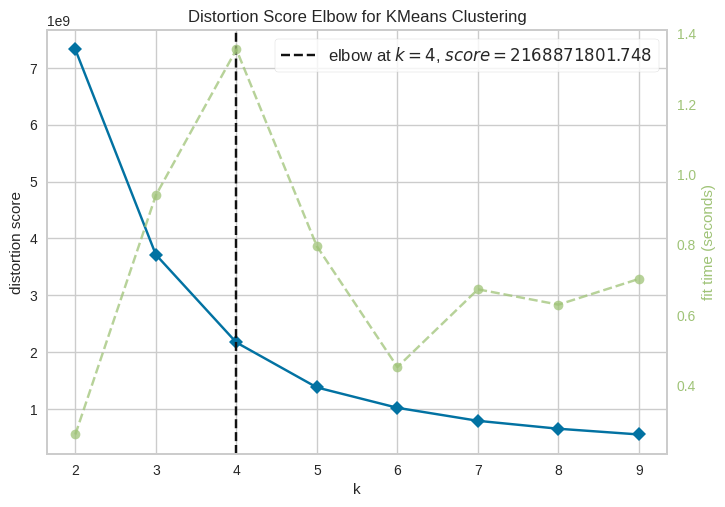

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [57]:
from yellowbrick.cluster import KElbowVisualizer

#Instantiate the clustering model and visualizer
km_model = KMeans()
visualizer = KElbowVisualizer(km_model, k=(2,10))

visualizer.fit(df_rftv)
visualizer.show()

In [58]:
# Set random state to 42
random_state = 42

km_model = KMeans(n_clusters=4, random_state=random_state)
km_model.fit(df_rftv)

# Creating new variable called cluster whose are the corresponding cluster for each point
df_rftv['cluster'] = km_model.labels_

In [59]:
#Grouping by clusters
df_clusters = df_rftv.groupby(['cluster'])['CLV']\
                    .agg(['mean', "count"])\
                    .reset_index()

df_clusters.columns = ["clusters", "avg_CLV", "n_customers"]

df_clusters['perct_customers'] = (df_clusters['n_customers']/df_clusters['n_customers']\
                                    .sum())*100

df_clusters

clusters    avg_CLV  n_customers  perct_customers
0         0    937.809         2223           83.697
1         1 70,064.319            2            0.075
2         2 13,221.793           19            0.715
3         3  3,583.720          412           15.512

In [60]:
#Rename the columns
df_rftv['CLTV_level'] = df_rftv['cluster']\
                            .replace({0:"Bronze", 1:"Platinum", 2:"Gold", 3:"Silver"})

In [61]:
df_rftv.head()

CLV  frequency  recency       T  monetary_value  \
CustomerID                                                         
12347      2,338.040      6.000  365.000 367.000         443.973   
12348        184.950      2.000  110.000 358.000          18.700   
12352      1,054.518      6.000  260.000 296.000         150.423   
12356        449.700      1.000   80.000 325.000         267.860   
12358      1,244.785      1.000  149.000 150.000         509.160   

            predict_purch_90  predict_purch_180  predict_purch_270  \
CustomerID                                                           
12347                  1.398              2.796              4.195   
12348                  0.593              1.186              1.778   
12352                  1.667              3.334              5.001   
12356                  0.416              0.832              1.248   
12358                  0.742              1.484              2.226   

            predict_purch_360  prob_alive  exp_avg_rev  avg_rev  error_rev  \
CustomerID                                                                   
12347                   5.593       1.000      431.389  443.973    -12.584   
12348                   2.371       1.000       80.486   18.700     61.786   
12352                   6.668       1.000      163.198  150.423     12.775   
12356                   1.664       1.000      278.879  267.860     11.019   
12358                   2.968       1.000      432.835  509.160    -76.325   

            cluster CLTV_level  
CustomerID                      
12347             3     Silver  
12348             0     Bronze  
12352             0     Bronze  
12356             0     Bronze  
12358             0     Bronze

In [62]:
df_rftv.shape

(2656, 15)

In [63]:
CLV = df_rftv['CLV'].sum()
# Format the sum in $ manually
CLV  = '${:,.0f}'.format(CLV)
print("Sum of the column:", CLV)

Sum of the column: $3,952,586


In [64]:
pred_purch = df_rft['predict_purch_360'].sum()
# Format the sum in $ manually
pred_purch  = '{:,.0f}'.format(pred_purch)
print("Sum of the column:", pred_purch)

Sum of the column: 15,008


In [65]:
error_rev = df_rftv['error_rev'].sum()
# Format the sum in $ manually
error_rev  = '${:,.0f}'.format(error_rev)
print("Sum of the column:", error_rev)

Sum of the column: $22,829


In [66]:
df_rftv.describe()

CLV  frequency   recency         T  monetary_value  \
count  2,656.000  2,656.000 2,656.000 2,656.000       2,656.000   
mean   1,488.172      4.277   203.383   259.280         267.006   
std    2,482.783      6.625   110.331   101.283         212.246   
min      160.629      1.000     1.000     9.000           0.950   
25%      553.183      1.000   107.000   196.000         134.567   
50%      974.850      3.000   210.000   283.000         220.572   
75%    1,772.966      5.000   301.000   358.000         337.495   
max   73,580.890    129.000   373.000   373.000       3,182.320   

       predict_purch_90  predict_purch_180  predict_purch_270  \
count         2,656.000          2,656.000          2,656.000   
mean              1.375              2.749              4.124   
std               1.385              2.771              4.156   
min               0.371              0.743              1.114   
25%               0.667              1.334              2.001   
50%               1.040              2.080              3.120   
75%               1.611              3.221              4.832   
max              26.180             52.359             78.539   

       predict_purch_360  prob_alive  exp_avg_rev   avg_rev  error_rev  \
count          2,656.000   2,656.000    2,656.000 2,656.000  2,656.000   
mean               5.498       1.000      275.601   267.006      8.595   
std                5.541       0.000      166.261   212.246     54.742   
min                1.485       1.000       28.505     0.950 -1,043.933   
25%                2.668       1.000      171.780   134.567     -4.727   
50%                4.159       1.000      236.749   220.572      9.225   
75%                6.442       1.000      329.603   337.495     31.841   
max              104.718       1.000    2,183.720 3,182.320    107.632   

        cluster  
count 2,656.000  
mean      0.480  
std       1.093  
min       0.000  
25%       0.000  
50%       0.000  
75%       0.000  
max       3.000

In [67]:
#Merge data results using customerID
df_rft_rftv = pd.merge(df_rft,df_rftv,on = 'CustomerID', how = 'outer')
result_rft_rftv = df_rft_rftv.drop_duplicates()

In [68]:
result_rft_rftv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2954 entries, 12347 to 18287
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   frequency_x          2954 non-null   float64
 1   recency_x            2954 non-null   float64
 2   T_x                  2954 non-null   float64
 3   monetary_value_x     2954 non-null   float64
 4   predict_purch_90_x   2951 non-null   float64
 5   predict_purch_180_x  2886 non-null   float64
 6   predict_purch_270_x  2826 non-null   float64
 7   predict_purch_360_x  2768 non-null   float64
 8   prob_alive_x         2954 non-null   float64
 9   CLV                  2656 non-null   float64
 10  frequency_y          2656 non-null   float64
 11  recency_y            2656 non-null   float64
 12  T_y                  2656 non-null   float64
 13  monetary_value_y     2656 non-null   float64
 14  predict_purch_90_y   2656 non-null   float64
 15  predict_purch_180_y  2656 non-null   f

In [69]:
result_combine_rft_rftv = result_rft_rftv[['frequency_x', 'recency_x', 'T_x', 'monetary_value_x',
                         'predict_purch_90_x', 'predict_purch_180_x', 'predict_purch_270_x',
                         'predict_purch_360_x', 'prob_alive_x', 'avg_rev', 'exp_avg_rev', 'error_rev',
                         'CLV', 'cluster', 'CLTV_level']]

result_combine_rft_rftv.rename(columns={'frequency_x': 'frequency_cltv', 'recency_x': 'recency_cltv', 'T_x': 'T_cltv', 'monetary_value_x': 'monetary_value_cltv',
                           'predict_purch_90_x': 'predict_purch_90','predict_purch_180_x': 'predict_purch_180','predict_purch_270_x': 'predict_purch_270',
                           'predict_purch_360_x': 'predict_purch_360', 'prob_alive_x': 'prob_alive', 'cluster': 'cluster_cltv'}, inplace=True)

In [70]:
result_combine_rft_rftv.head()

frequency_cltv  recency_cltv  T_cltv  monetary_value_cltv  \
CustomerID                                                              
12347                6.000       365.000 367.000              443.973   
12348                2.000       110.000 358.000               18.700   
12349                0.000         0.000  18.000                0.000   
12350                0.000         0.000 310.000                0.000   
12352                6.000       260.000 296.000              150.423   

            predict_purch_90  predict_purch_180  predict_purch_270  \
CustomerID                                                           
12347                  1.398              2.796              4.195   
12348                  0.593              1.186              1.778   
12349                  0.829                NaN                NaN   
12350                  0.198              0.395              0.593   
12352                  1.667              3.334              5.001   

            predict_purch_360  prob_alive  avg_rev  exp_avg_rev  error_rev  \
CustomerID                                                                   
12347                   5.593       1.000  443.973      431.389    -12.584   
12348                   2.371       1.000   18.700       80.486     61.786   
12349                     NaN       1.000      NaN          NaN        NaN   
12350                   0.790       1.000      NaN          NaN        NaN   
12352                   6.668       1.000  150.423      163.198     12.775   

                 CLV  cluster_cltv CLTV_level  
CustomerID                                     
12347      2,338.040         3.000     Silver  
12348        184.950         0.000     Bronze  
12349            NaN           NaN        NaN  
12350            NaN           NaN        NaN  
12352      1,054.518         0.000     Bronze

In [71]:
result_combine_rft_rftv.sort_values(by="CLV", ascending=False)

frequency_cltv  recency_cltv  T_cltv  monetary_value_cltv  \
CustomerID                                                              
14096               16.000        97.000 101.000            2,250.573   
14911              129.000       372.000 373.000              657.350   
13089               58.000       364.000 368.000              605.830   
17841              111.000       372.000 373.000              289.743   
14298               23.000       352.000 360.000              979.279   
...                    ...           ...     ...                  ...   
17859                0.000         0.000 304.000                0.000   
18024                0.000         0.000 152.000                0.000   
18159                0.000         0.000 301.000                0.000   
18262                0.000         0.000 140.000                0.000   
18281                0.000         0.000 180.000                0.000   

            predict_purch_90  predict_purch_180  predict_purch_270  \
CustomerID                                                           
14096                  8.693             17.385             26.078   
14911                 26.180             52.359             78.539   
13089                 11.998             23.997             35.995   
17841                 22.550             45.101             67.651   
14298                  4.951              9.903             14.854   
...                      ...                ...                ...   
17859                  0.201              0.401              0.602   
18024                  0.336              0.672                NaN   
18159                  0.202              0.405              0.607   
18262                  0.355              0.710                NaN   
18281                  0.299              0.598              0.897   

            predict_purch_360  prob_alive   avg_rev  exp_avg_rev  error_rev  \
CustomerID                                                                    
14096                  34.771       1.000 2,250.573    2,183.720    -66.853   
14911                 104.718       1.000   657.350      655.777     -1.572   
13089                  47.994       1.000   605.830      602.851     -2.979   
17841                  90.201       1.000   289.743      289.786      0.044   
14298                  19.805       1.000   979.279      962.886    -16.393   
...                       ...         ...       ...          ...        ...   
17859                   0.803       1.000       NaN          NaN        NaN   
18024                     NaN       1.000       NaN          NaN        NaN   
18159                   0.809       1.000       NaN          NaN        NaN   
18262                     NaN       1.000       NaN          NaN        NaN   
18281                     NaN       1.000       NaN          NaN        NaN   

                  CLV  cluster_cltv CLTV_level  
CustomerID                                      
14096      73,580.890         1.000   Platinum  
14911      66,547.749         1.000   Platinum  
13089      28,038.099         2.000       Gold  
17841      25,330.513         2.000       Gold  
14298      18,480.156         2.000       Gold  
...               ...           ...        ...  
17859             NaN           NaN        NaN  
18024             NaN           NaN        NaN  
18159             NaN           NaN        NaN  
18262             NaN           NaN        NaN  
18281             NaN           NaN        NaN  

[2954 rows x 15 columns]

In [72]:
result_combine_rft_rftv.describe()

frequency_cltv  recency_cltv    T_cltv  monetary_value_cltv  \
count       2,954.000     2,954.000 2,954.000            2,954.000   
mean            3.845       182.866   251.406              240.070   
std             6.412       121.234   104.653              216.728   
min             0.000         0.000     0.000                0.000   
25%             1.000        70.000   180.000              108.317   
50%             2.000       189.000   276.000              197.294   
75%             4.000       289.000   351.750              319.450   
max           129.000       373.000   373.000            3,182.320   

       predict_purch_90  predict_purch_180  predict_purch_270  \
count         2,951.000          2,886.000          2,826.000   
mean              1.274              2.575              3.918   
std               1.350              2.724              4.111   
min               0.170              0.339              0.509   
25%               0.583              1.167              1.788   
50%               0.967              1.963              2.969   
75%               1.519              3.112              4.718   
max              26.180             52.359             78.539   

       predict_purch_360  prob_alive   avg_rev  exp_avg_rev  error_rev  \
count          2,768.000   2,954.000 2,656.000    2,656.000  2,656.000   
mean               5.309       1.000   267.006      275.601      8.595   
std                5.506       0.000   212.246      166.261     54.742   
min                0.679       1.000     0.950       28.505 -1,043.933   
25%                2.499       1.000   134.567      171.780     -4.727   
50%                4.029       1.000   220.572      236.749      9.225   
75%                6.338       1.000   337.495      329.603     31.841   
max              104.718       1.000 3,182.320    2,183.720    107.632   

             CLV  cluster_cltv  
count  2,656.000     2,656.000  
mean   1,488.172         0.480  
std    2,482.783         1.093  
min      160.629         0.000  
25%      553.183         0.000  
50%      974.850         0.000  
75%    1,772.966         0.000  
max   73,580.890         3.000

In [73]:
result_rfm_combine = data_process[['CustomerID', 'Recency', 'Frequency', 'MonetaryValue', 'MapCluster', 'RFM_Level']]

result_rfm_combine.rename(columns={'Frequency': 'frequency_rfm', 'Recency': 'recency_rfm', 'MonetaryValue': 'monetary_value_rfm',
                                   'MapCluster': 'cluster_rfm', 'RFM_Level': 'RFM_level'}, inplace=True)

In [74]:
result_rfm_combine

CustomerID  recency_rfm  frequency_rfm  monetary_value_rfm  cluster_rfm  \
0         12347            2              7                3314            2   
1         12348          249              3                  90            1   
2         12349           19              1                 999            2   
3         12350          310              1                 294            1   
4         12352           36              7                1130            2   
...         ...          ...            ...                 ...          ...   
4187      18280          278              1                 137            1   
4188      18281          181              1                  46            1   
4189      18282            8              2                 113            2   
4190      18283            4             16                2051            2   
4191      18287           43              3                 960            2   

     RFM_level  
0         Gold  
1       Silver  
2         Gold  
3       Silver  
4         Gold  
...        ...  
4187    Silver  
4188    Silver  
4189      Gold  
4190      Gold  
4191      Gold  

[4192 rows x 6 columns]

In [75]:
#Merge data results using customerID
df_rfm_rft_rftv = pd.merge(result_rfm_combine,result_combine_rft_rftv,on = 'CustomerID', how = 'outer')
result_rfm_rft_rftv = df_rfm_rft_rftv.drop_duplicates()

In [76]:
result_rfm_rft_rftv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           4192 non-null   object 
 1   recency_rfm          4192 non-null   int64  
 2   frequency_rfm        4192 non-null   int64  
 3   monetary_value_rfm   4192 non-null   int64  
 4   cluster_rfm          4192 non-null   int64  
 5   RFM_level            4192 non-null   object 
 6   frequency_cltv       2954 non-null   float64
 7   recency_cltv         2954 non-null   float64
 8   T_cltv               2954 non-null   float64
 9   monetary_value_cltv  2954 non-null   float64
 10  predict_purch_90     2951 non-null   float64
 11  predict_purch_180    2886 non-null   float64
 12  predict_purch_270    2826 non-null   float64
 13  predict_purch_360    2768 non-null   float64
 14  prob_alive           2954 non-null   float64
 15  avg_rev              2656 non-null   f

In [77]:
combine_rfm_cltv = result_rfm_rft_rftv[['frequency_rfm', 'frequency_cltv',
                            'recency_rfm', 'recency_cltv', 'T_cltv', 'monetary_value_rfm',
                            'monetary_value_cltv', 'prob_alive', 'predict_purch_90', 'predict_purch_180',
                            'predict_purch_270', 'predict_purch_360', 'avg_rev', 'exp_avg_rev', 'error_rev',
                            'CLV', 'cluster_rfm', 'RFM_level', 'cluster_cltv', 'CLTV_level']]

In [78]:
combine_rfm_cltv.head()

frequency_rfm  frequency_cltv  recency_rfm  recency_cltv  T_cltv  \
0              7           6.000            2       365.000 367.000   
1              3           2.000          249       110.000 358.000   
2              1           0.000           19         0.000  18.000   
3              1           0.000          310         0.000 310.000   
4              7           6.000           36       260.000 296.000   

   monetary_value_rfm  monetary_value_cltv  prob_alive  predict_purch_90  \
0                3314              443.973       1.000             1.398   
1                  90               18.700       1.000             0.593   
2                 999                0.000       1.000             0.829   
3                 294                0.000       1.000             0.198   
4                1130              150.423       1.000             1.667   

   predict_purch_180  predict_purch_270  predict_purch_360  avg_rev  \
0              2.796              4.195              5.593  443.973   
1              1.186              1.778              2.371   18.700   
2                NaN                NaN                NaN      NaN   
3              0.395              0.593              0.790      NaN   
4              3.334              5.001              6.668  150.423   

   exp_avg_rev  error_rev       CLV  cluster_rfm RFM_level  cluster_cltv  \
0      431.389    -12.584 2,338.040            2      Gold         3.000   
1       80.486     61.786   184.950            1    Silver         0.000   
2          NaN        NaN       NaN            2      Gold           NaN   
3          NaN        NaN       NaN            1    Silver           NaN   
4      163.198     12.775 1,054.518            2      Gold         0.000   

  CLTV_level  
0     Silver  
1     Bronze  
2        NaN  
3        NaN  
4     Bronze

In [79]:
combine_rfm_cltv.sort_values(by="CLV", ascending=False)

frequency_rfm  frequency_cltv  recency_rfm  recency_cltv  T_cltv  \
1252             17          16.000            4        97.000 101.000   
1829            193         129.000            1       372.000 373.000   
543              80          58.000            4       364.000 368.000   
3886            123         111.000            2       372.000 373.000   
1393             40          23.000            8       352.000 360.000   
...             ...             ...          ...           ...     ...   
4184              1             NaN           44           NaN     NaN   
4185              1             NaN           58           NaN     NaN   
4186              1             NaN           74           NaN     NaN   
4187              1             NaN          278           NaN     NaN   
4188              1           0.000          181         0.000 180.000   

      monetary_value_rfm  monetary_value_cltv  prob_alive  predict_purch_90  \
1252               36019            2,250.573       1.000             8.693   
1829               85018              657.350       1.000            26.180   
543                36411              605.830       1.000            11.998   
3886               32644              289.743       1.000            22.550   
1393               24387              979.279       1.000             4.951   
...                  ...                  ...         ...               ...   
4184                 213                  NaN         NaN               NaN   
4185                 110                  NaN         NaN               NaN   
4186                 173                  NaN         NaN               NaN   
4187                 137                  NaN         NaN               NaN   
4188                  46                0.000       1.000             0.299   

      predict_purch_180  predict_purch_270  predict_purch_360   avg_rev  \
1252             17.385             26.078             34.771 2,250.573   
1829             52.359             78.539            104.718   657.350   
543              23.997             35.995             47.994   605.830   
3886             45.101             67.651             90.201   289.743   
1393              9.903             14.854             19.805   979.279   
...                 ...                ...                ...       ...   
4184                NaN                NaN                NaN       NaN   
4185                NaN                NaN                NaN       NaN   
4186                NaN                NaN                NaN       NaN   
4187                NaN                NaN                NaN       NaN   
4188              0.598              0.897                NaN       NaN   

      exp_avg_rev  error_rev        CLV  cluster_rfm RFM_level  cluster_cltv  \
1252    2,183.720    -66.853 73,580.890            3  Platinum         1.000   
1829      655.777     -1.572 66,547.749            3  Platinum         1.000   
543       602.851     -2.979 28,038.099            3  Platinum         2.000   
3886      289.786      0.044 25,330.513            3  Platinum         2.000   
1393      962.886    -16.393 18,480.156            3  Platinum         2.000   
...           ...        ...        ...          ...       ...           ...   
4184          NaN        NaN        NaN            2      Gold           NaN   
4185          NaN        NaN        NaN            2      Gold           NaN   
4186          NaN        NaN        NaN            2      Gold           NaN   
4187          NaN        NaN        NaN            1    Silver           NaN   
4188          NaN        NaN        NaN            1    Silver           NaN   

     CLTV_level  
1252   Platinum  
1829   Platinum  
543        Gold  
3886       Gold  
1393       Gold  
...         ...  
4184        NaN  
4185        NaN  
4186        NaN  
4187        NaN  
4188        NaN  

[4192 rows x 20 columns]

##CLTV Segmentations Data Viz

In [80]:
import plotly.express as px

# Grouping by customer category
df_cat = pd.DataFrame(combine_rfm_cltv.groupby(['CLTV_level'])['CLV'].agg('mean')).reset_index()

# Sorting the dataframe based on CLV in descending order
df_cat = df_cat.sort_values(by='CLV', ascending=False)

# Plotting the bar chart using Plotly
fig = px.bar(df_cat, x="CLTV_level", y="CLV",
             labels={"CLTV_level": "CLTV Level", "CLV": "CLV"},
             title="CLV per category",
             width=800, height=600)

# Adding text to each bar
for i, row in df_cat.iterrows():
    fig.add_annotation(x=row['CLTV_level'], y=row['CLV'],
                       text=f"{row['CLV']:.0f}",
                       showarrow=False,
                       font=dict(size=12),
                       yshift=10)

# Updating layout
fig.update_layout(xaxis_title="CLTV Level", yaxis_title="CLV",
                  xaxis=dict(categoryorder="total descending"))

# Showing the plot
fig.show()

In [81]:
import plotly.express as px

# Grouping by customer category
df_freq = pd.DataFrame(combine_rfm_cltv.groupby(['CLTV_level'])['predict_purch_360'].mean().reset_index())

# Sorting the dataframe based on predict_purch_360 in descending order
df_freq = df_freq.sort_values(by='predict_purch_360', ascending=False)

# Plotting the bar chart using Plotly
fig = px.bar(df_freq, x="CLTV_level", y="predict_purch_360",
             labels={"CLTV_level": "CLTV Level", "predict_purch_360": "Frequency"},
             title="Prediction of Average Purchase next 360 days per category",
             width=800, height=600)

# Adding text to each bar
for i, row in df_freq.iterrows():
    fig.add_annotation(x=row['CLTV_level'], y=row['predict_purch_360'],
                       text=f"{row['predict_purch_360']:.0f}",
                       showarrow=False,
                       font=dict(size=12),
                       yshift=10)

# Updating layout
fig.update_layout(xaxis_title="CLTV Level", yaxis_title="Average Purchase",
                  xaxis=dict(categoryorder="total descending"))

# Showing the plot
fig.show()